<a href="https://colab.research.google.com/github/MedBALBSIR/PC-labs-MLF-BALBSIR-Mohammed/blob/main/Ex_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Set font properties for plots
font = {'weight': 'bold', 'size': 12}
matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [ ]:
def display_random_images(X_data: np.array, y_data: np.array, count: int = 10):
    indices = np.random.choice(len(X_data), count, replace=False)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, count, i+1)
        plt.imshow(X_data[idx], cmap='gray')
        plt.title(f"Label: {y_data[idx]}", fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


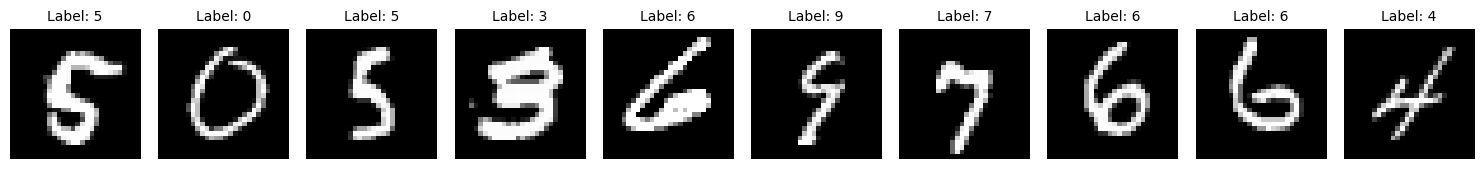

In [ ]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [ ]:
# Answers to Dataset Examination Questions:

# 1. What kind of data occurs in our dataset?
# - 28x28 grayscale images of handwritten digits (0-9)
# - Pixel values range: 0-255 (black to white)

# 2. How many data samples?
print(f"Training samples: {X_train.shape[0]}")  # 60,000
print(f"Test samples: {X_test.shape[0]}")       # 10,000

# 3. Color channels:
print(f"Input channels: {X_train.shape[-1] if len(X_train.shape) > 3 else 1}")  # 1 (grayscale)

# 4. Image size:
print(f"Image dimensions: {X_train.shape[1:3]}")  # (28, 28)

# 5. X preprocessing needed:
# - Normalization (scale to 0-1)
# - Add channel dimension
# - Convert to float32

# 6. Number of classes:
print(f"Unique classes: {len(np.unique(y_train))}")  # 10

# 7. y preprocessing needed:
# - One-hot encoding

# 1.3 Dataset Preprocessing Implementation
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Add channel dimension (for CNN input)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("\nAfter preprocessing:")
print(f"X_train shape: {X_train.shape}")  # (60000, 28, 28, 1)
print(f"y_train shape: {y_train.shape}")  # (60000, 10)
print(f"Sample pixel range: {X_train.min():.1f}-{X_train.max():.1f}")  # 0.0-1.0

Training samples: 60000
Test samples: 10000
Input channels: 1
Image dimensions: (28, 28)
Unique classes: 10

After preprocessing:
X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
Sample pixel range: 0.0-1.0


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add (Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Input + Conv
model.add(MaxPooling2D((2, 2)))  # MaxPooling
model.add(Flatten())  # Flatten
model.add(Dense(10, activation='softmax'))  # Output layer

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

None


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [ ]:
from tensorflow.keras.optimizers import Adam

# Configure model components for multiclass classification
loss = 'categorical_crossentropy'
optimizer = Adam(learning_rate=0.001)
metrics = ['accuracy']

# Compile the model
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

None


### 3. Training stage

#### 3.1 Model training

In [ ]:
# Re-run the training code
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8718 - loss: 0.4533 - val_accuracy: 0.9739 - val_loss: 0.0988
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9734 - loss: 0.0899 - val_accuracy: 0.9803 - val_loss: 0.0719
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9815 - loss: 0.0662 - val_accuracy: 0.9787 - val_loss: 0.0700
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9837 - loss: 0.0563 - val_accuracy: 0.9812 - val_loss: 0.0639
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9871 - loss: 0.0426 - val_accuracy: 0.9805 - val_loss: 0.0640
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9894 - loss: 0.0364 - val_accuracy: 0.9839 - val_loss: 0.0617
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9828 - val_loss: 0.0626
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9926 -

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

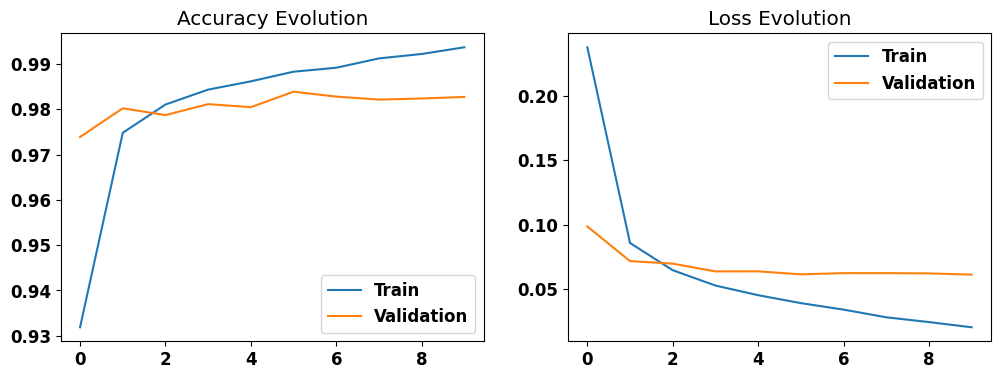

In [ ]:
# Plotting code (updated with correct key names)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')       # Might be 'acc' in older TF versions
plt.plot(history.history['val_accuracy'], label='Validation')  # Might be 'val_acc'
plt.title('Accuracy Evolution')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Evolution')
plt.legend()
plt.show()

In [ ]:
print("Pixel range:", X_train.min(), X_train.max())  # Should be 0.0-1.0
print("Label format:", y_train[0])  # Should be one-hot encoded array

Pixel range: 0.0 1.0
Label format: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model.summary()  # Should show Conv2D -> MaxPool -> Flatten -> Dense(10)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,232 (637.63 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,822 (425.09 KB)

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

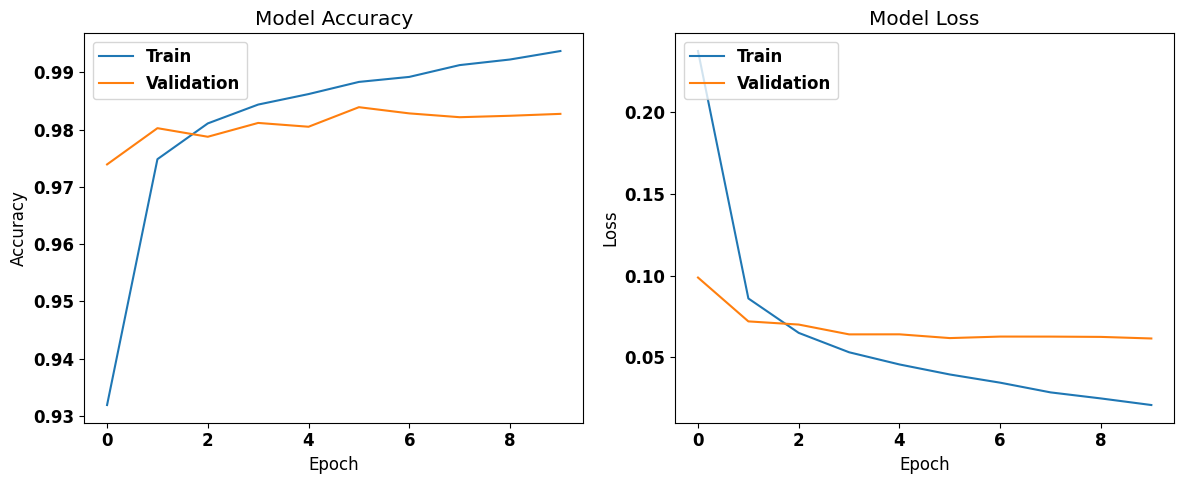

In [ ]:
# 3.1 Model Evaluation Plots
import matplotlib.pyplot as plt

# Check if history exists and contains required keys
try:
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])  # Might be 'acc' in older versions
    plt.plot(history.history['val_accuracy'])  # Might be 'val_acc'
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

except NameError:
    print("Error: First train the model using model.fit() to get history object")
except KeyError as e:
    print(f"Key error: {e}. Check if your TF version uses 'acc'/'val_acc' instead of 'accuracy'/'val_accuracy'")

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [ ]:
###################################
# Write your own code here #



###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

Test Accuracy: 0.9833
Test Loss: 0.0557
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


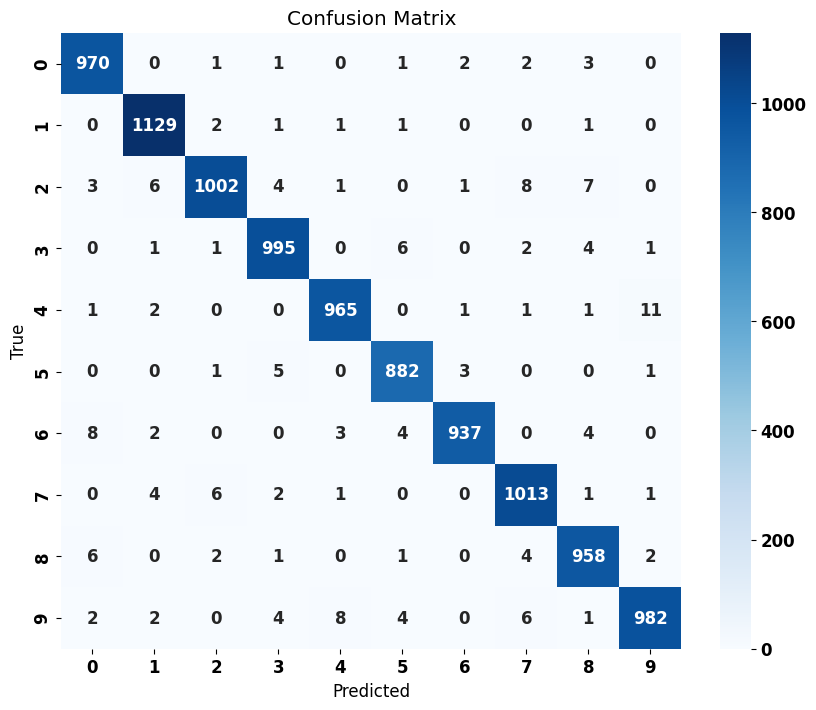


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.5181 - loss: 1.7439 - val_accuracy: 0.9352 - val_loss: 0.4910
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.8898 - loss: 0.6062 - val_accuracy: 0.9580 - val_loss: 0.3817
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 59ms/step - accuracy: 0.9234 - loss: 0.4822 - val_accuracy: 0.9651 - val_loss: 0.3343
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.9402 - loss: 0.4130 - val_accuracy: 0.9700 - val_loss: 0.2972
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 64ms/step - accuracy: 0.9474 - loss: 0.3703 - val_accuracy: 0.9753 - val_loss: 0.2683
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.9521 - loss: 0.3346 - val_accuracy: 0.9778 - val_loss: 0.2459
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.9591 - loss: 0.3001 - val_accuracy: 0.9789 - val_loss: 0.2256
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.9606 - loss: 0.2750 - 

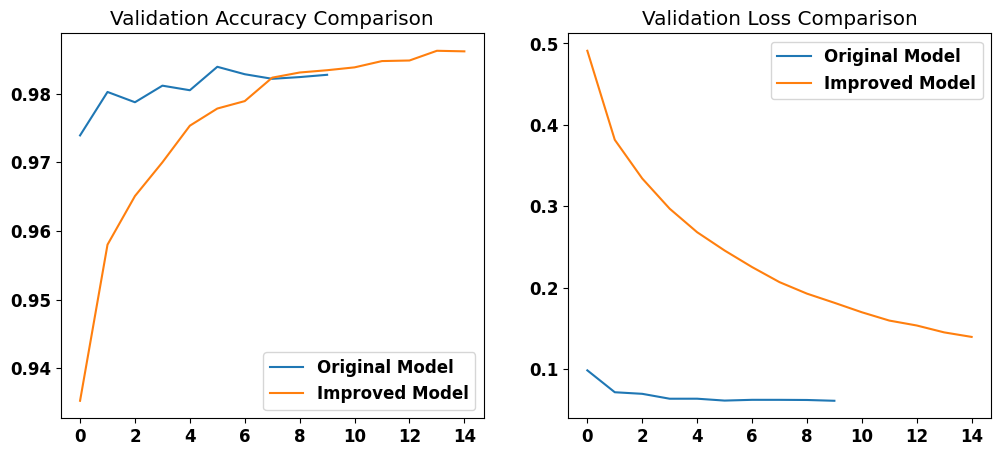

In [ ]:
# 4. Model Evaluation on Test Set
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate basic metrics
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# 5. Improved Model with Regularization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Enhanced model architecture
improved_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile with lower learning rate
improved_model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the improved model
improved_history = improved_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=64
)

# Evaluate improved model
improved_test_loss, improved_test_acc = improved_model.evaluate(X_test, y_test, verbose=0)
print(f"\nImproved Model Test Accuracy: {improved_test_acc:.4f}")
print(f"Improved Model Test Loss: {improved_test_loss:.4f}")

# Plot comparison
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'], label='Original Model')
plt.plot(improved_history.history['val_accuracy'], label='Improved Model')
plt.title('Validation Accuracy Comparison')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['val_loss'], label='Original Model')
plt.plot(improved_history.history['val_loss'], label='Improved Model')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()